In [1]:
import cv2
from hough_utils import *

# 1) Hough transform for detecting circles 

## 1.1) Single circle

finished....


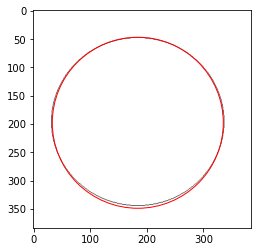

In [2]:
file_path = "./res/ex1.png"
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
img = cv2.Canny(img,50,150)
res = detectCircles(img,9,30,radius = [160,140])
displayCircles(res, file_path)

## 1.2) Multiple circles with same radius 

finished....


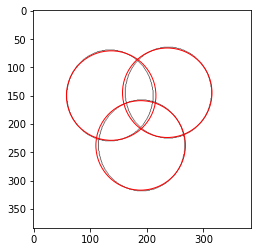

In [3]:
file_path = "./res/ex2.png"
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
img = cv2.Canny(img,50,150)
res = detectCircles(img,8,40,radius = [80,60])  
displayCircles(res, file_path)

## 1.3) Multiple circles with different radius

finished....


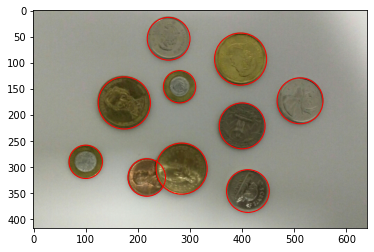

In [4]:
file_path = "./res/HoughCircles.jpg"
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
img = cv2.Canny(img,50,150)
res = detectCircles(img,12,15,radius = [60,2])
displayCircles(res, file_path)

# 2) Hough transform for lines detection

## 2.1) visualizing accumulator array

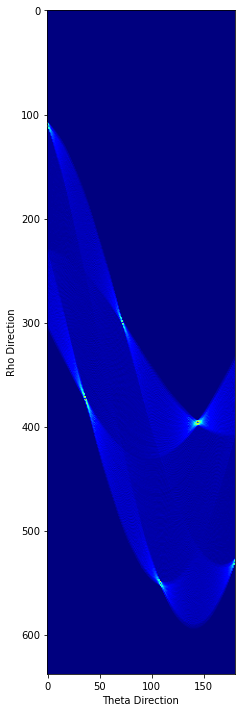

In [5]:
image_name = "res/pantagon.png"

# Loads an image
csrc = cv2.imread(cv2.samples.findFile(image_name), cv2.IMREAD_COLOR)
graysrc = cv2.cvtColor(csrc, cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(graysrc,150,200)
acc, rhos,thetas = hough_line_accumulator(edges)
indices = hough_simple_peaks(acc, 5)
plot_hough_accumulator(acc)


## 2.2) detect lines in pantagon shape 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

image_name = "res/pantagon.png"

# Loads an image
src = cv2.imread(cv2.samples.findFile(image_name), cv2.IMREAD_GRAYSCALE)
src_colored = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

edges = cv2.Canny(src,150,250)
csrc = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)



H, thetas , rhos = hough_line_accumulator(edges)
indices = hough_simple_peaks(H, 20)
hough_lines_draw(csrc, indices, rhos, thetas)


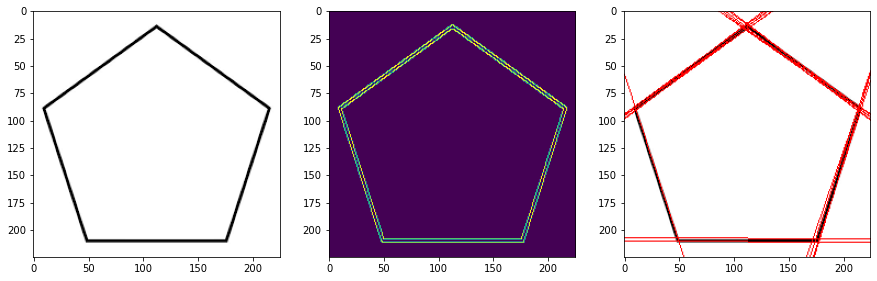

In [7]:
fig, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(src_colored)
axs[1].imshow(edges)
axs[2].imshow(csrc)


## 2.3) detect lines in sudoku shape

In [8]:
import matplotlib.pyplot as plt
import numpy as np

image_name = "res/sudoku.png"

# Loads an image
src = cv2.imread(cv2.samples.findFile(image_name), cv2.IMREAD_GRAYSCALE)
src_colored = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

edges = cv2.Canny(src,50,150)
csrc = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)



H, thetas , rhos = hough_line_accumulator(edges)
indices = hough_simple_peaks(H, 30)
hough_lines_draw(csrc, indices, rhos, thetas)


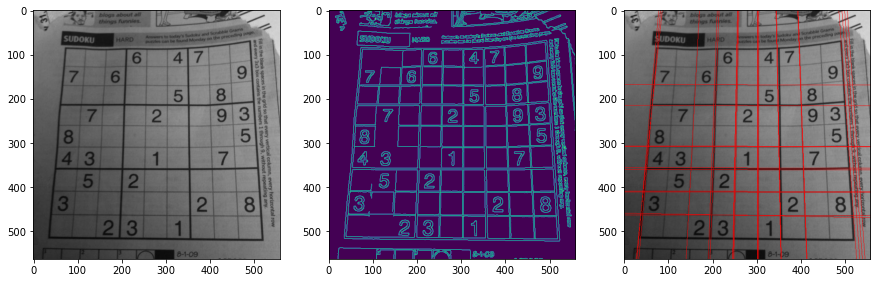

In [9]:
fig, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(src_colored)
axs[1].imshow(edges)
axs[2].imshow(csrc)


# 3) Active Contour

In [10]:
import snake
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\galloul\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


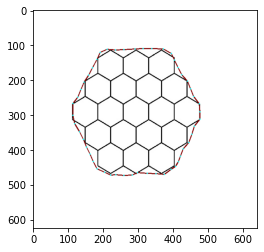

In [11]:
image = cv2.imread( "images/example.jpg", cv2.IMREAD_COLOR)

snake = snake.Snake( image, closed = True )

snake.set_alpha = 50
snake.set_beta = 50
snake.set_delta = 10
snake.w_line = 50
snake.w_edge = 50
snake.w_term = 50


# Apply gradient descent
for i in range(100):
    snake_changed = snake.step()

snakeImg = snake.visualize()    
    
plt.imshow(snakeImg, cmap='gray');


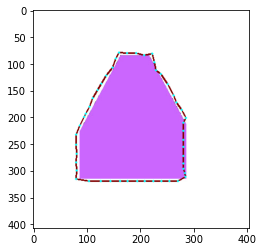

In [12]:
import snake

# Loads the another image
image2 = cv2.imread( "images/example2.jpg", cv2.IMREAD_COLOR )

snake = snake.Snake( image2, closed = True )

snake.set_alpha = 50
snake.set_beta = 50
snake.set_delta = 10
snake.w_line = 50
snake.w_edge = 50
snake.w_term = 50


for i in range(200):
    snake_changed = snake.step()

snakeImg = snake.visualize()    
    
plt.imshow(snakeImg, cmap='gray');


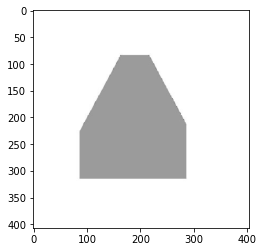

In [13]:
from snake import adaptive_thresholding
gry = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(gry, cmap='gray')

# Active Contour (Morphological Snakes) 


In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import matplotlib.image as mpimg
import numpy as np 
import cv2 as cv

import morphsnakes as ms
from imageio import imread
from contour_util import rgb2gray

from contour_util import gradient_detector_azoz, comparison_plot, gaussian_fft_filter, inverse_gaussian_gradient

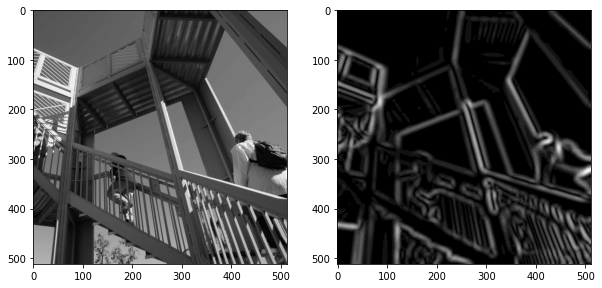

In [2]:
# scipy function to calc gaussian gradient magnitude to compare our implementation
ascent = misc.ascent()
result = ndimage.gaussian_gradient_magnitude(ascent, sigma=5)
comparison_plot(ascent, result)


## Inverse Gaussian Gradient `gimage`
a preprocessed version of the original image that enhances and highlights the borders (or other structures) of the object to segment. `morphological_geodesic_active_contour` will try to stop the contour evolution in areas where `gimage` is small.  

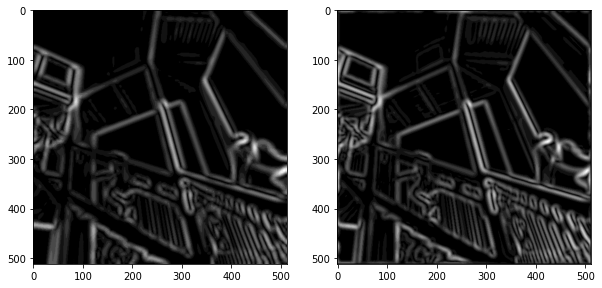

In [3]:
ascent = misc.ascent()
ascent_lpf, _ = gaussian_fft_filter(ascent, 20)
mag, phase = gradient_detector_azoz(ascent_lpf)

comparison_plot(result, mag)
# left scipy                            # right ours

-  The classic snakes provide an accurate location of the edges only if the initial contour is
given sufficiently near the edges because they make use of only the local information along the
contour.
-  Estimating a proper position of initial contours without prior knowledge is a difficult
problem. 
- Also, classic snakes cannot detect more than one boundary simultaneously because
the snakes maintain the same topology during the evolution stage. 
- snakes cannot split to multiple boundaries or merge from multiple initial contours. Level set theory has given a
solution for this problem

>  the evolution of the contour is equivalent to the evolution of the level set function
>  Section 3.1 to 3.4 in `file:///C:/Users/Mohamed%20Abdelaziz/Downloads/MSnakes-master/etd.pdf` explain briefley the level set methodology compared to classical snake

> The following links explain the morphological snake approach.
>
>  `http://www.dia.fi.upm.es/~lbaumela/WEB/publications/pami2013.pdf`
> 
> `https://www.ipol.im/pub/art/2012/abmh-rtmsa/article.pdf`


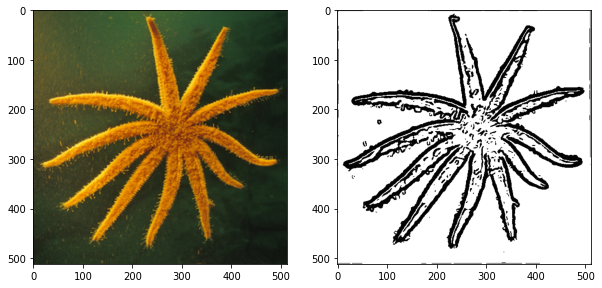

In [5]:
imgcolor = imread("./images/seastar.png") 
img_resized  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)
gimage = ms.inverse_gaussian_gradient(img_resized, alpha=500, cutoff_lpf=40) 
comparison_plot(img_resized, gimage)

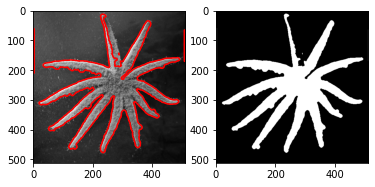

In [6]:
imgcolor = imread("./images/seastar.png")
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
gimg = ms.inverse_gaussian_gradient(img_resized, alpha=1200, cutoff_lpf=30)

init_ls = ms.circle_level_set(img_resized.shape, radius = 350)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=220,
                                             circle_level_set=init_ls,
                                             smoothing=1, threshold=.22,
                                             balloon=-1)

ms.visualize_contour_segment(img_resized, levelSet)

(225, 300, 3)


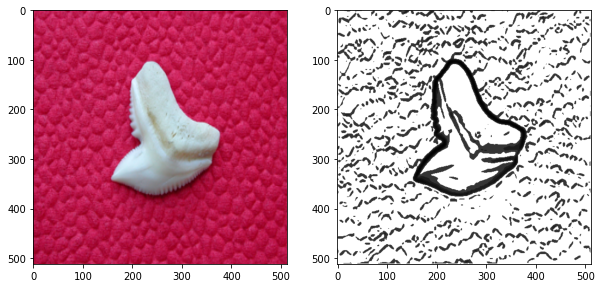

In [7]:
imgcolor = imread("./images/shark_tooth.png") 
print(imgcolor.shape)
img_resized  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)
gimage = ms.inverse_gaussian_gradient(img_resized, alpha= 10, cutoff_lpf=30) 
comparison_plot(img_resized, gimage)

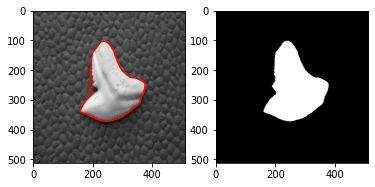

In [8]:
imgcolor = imread("./images/shark_tooth.png")
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
gimg = ms.inverse_gaussian_gradient(img_resized, alpha=10, cutoff_lpf=30)
init_ls = ms.circle_level_set(img_resized.shape)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=100,
                                                smoothing=1, threshold=0.3,
                                                circle_level_set=init_ls,
                                                balloon=-1)
                                             
ms.visualize_contour_segment(img_resized, levelSet)

(206, 204, 3)


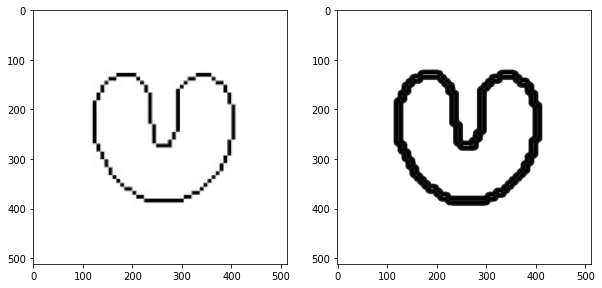

In [9]:
imgcolor = imread("./images/example4.jpg") 
print(imgcolor.shape)
img_resized  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)
gimage = ms.inverse_gaussian_gradient(img_resized, alpha= 10, cutoff_lpf=30) 
comparison_plot(img_resized, gimage)

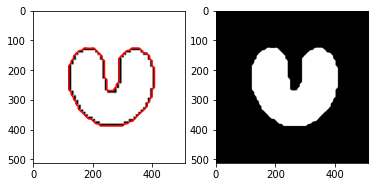

In [10]:
imgcolor = imread("./images/example4.jpg")
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
gimg = ms.inverse_gaussian_gradient(img_resized, alpha=10, cutoff_lpf=30)
init_ls = ms.circle_level_set(img_resized.shape)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=200,
                                                smoothing=1, threshold=0.2,
                                                circle_level_set=init_ls,
                                                balloon=-1)
                                             
ms.visualize_contour_segment(img_resized, levelSet)                          

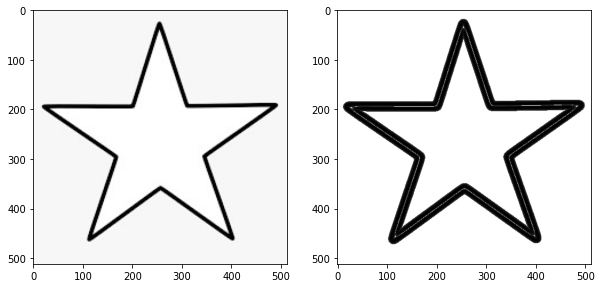

In [11]:
imgcolor = imread("./images/star.jpeg") 
img_resized  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)
gimage = ms.inverse_gaussian_gradient(img_resized, alpha= 10, cutoff_lpf=30) 
comparison_plot(img_resized, gimage)

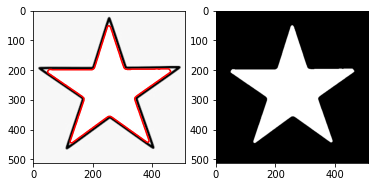

In [12]:
imgcolor = imread("./images/star.jpeg")
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
gimg = ms.inverse_gaussian_gradient(img_resized, alpha=10, cutoff_lpf=30)
init_ls = ms.circle_level_set(img_resized.shape, radius=10)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=200,
                                                smoothing=2, threshold=.6,
                                                circle_level_set=init_ls,
                                                balloon=1)
                                             
ms.visualize_contour_segment(img_resized, levelSet) 

(256, 256, 3)


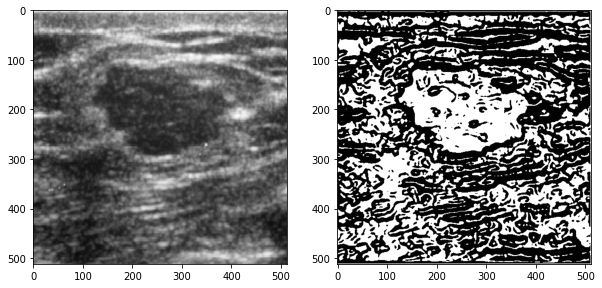

In [13]:
imgcolor = imread("./images/mama07ORI.bmp") 
print(imgcolor.shape)
img_resized  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)
gimage = ms.inverse_gaussian_gradient(img_resized, alpha= 2000, cutoff_lpf=30) 
comparison_plot(img_resized, gimage)

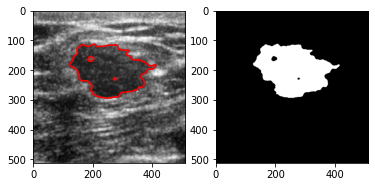

In [14]:
imgcolor = imread("./images/mama07ORI.bmp")
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
gimg = ms.inverse_gaussian_gradient(img_resized, alpha=2000, cutoff_lpf=30)
init_ls = ms.circle_level_set(img_resized.shape, radius=10)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=200,
                                                smoothing=2, threshold=.2,
                                                circle_level_set=init_ls,
                                                balloon=1)
                                             
ms.visualize_contour_segment(img_resized, levelSet) 

## AREA - PEREMITER 


In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import matplotlib.image as mpimg
import numpy as np 
import cv2 as cv

import morphsnakes as ms
from imageio import imread
from contour_util import rgb2gray

from contour_util import gradient_detector_azoz, comparison_plot, gaussian_fft_filter, inverse_gaussian_gradient, convolve2D
from area_circum  import overlay_contour, boundary_erosion, bwperim, calculate_peremiter, bwarea

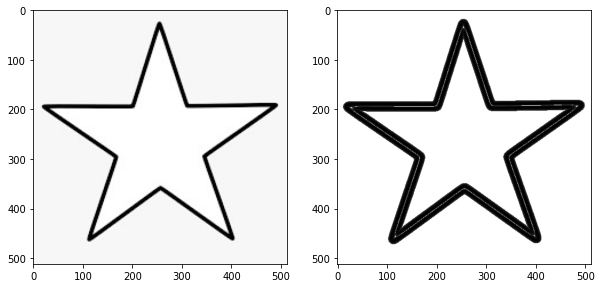

In [2]:
imgcolor = imread("./images/star.jpeg") 
# print(imgcolor.shape)
img_resized  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)
gimage = ms.inverse_gaussian_gradient(img_resized, alpha= 10, cutoff_lpf=30) 
comparison_plot(img_resized, gimage)

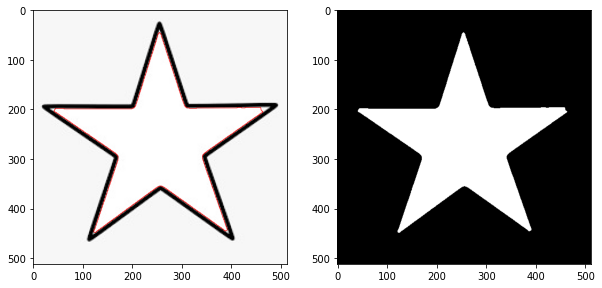

In [3]:
imgcolor = imread("./images/star.jpeg")
# ./images/shark_tooth.png
# ./images/star.jpeg
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
img_resized_rgb  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)

gimg = ms.inverse_gaussian_gradient(img_resized, alpha=10, cutoff_lpf=30)
init_ls = ms.circle_level_set(img_resized.shape, radius=10)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=200,
                                                smoothing=1, threshold=.6,
                                                circle_level_set=init_ls,
                                                balloon=1)
# overlay_countour get boundary of LevelSet(segment) by [image - eroded(image)] 
overlay_img = overlay_contour(img_resized_rgb, levelSet) 
comparison_plot(overlay_img, levelSet)

Perimeter Pixels by 4 connectivity:  1449
Perimeter Pixels by erosion:         2036
Perimeter Pixels by 8 connectivity:  2036


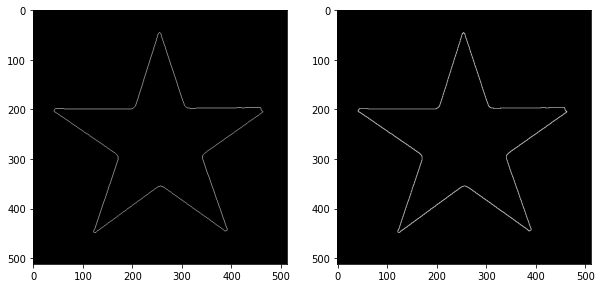

In [4]:
# number of pixels for both area and peremiter (not an accurate measurement)
img_boundary = boundary_erosion(levelSet)
# plt.imshow(img_boundary, cmap='gray')

# connectivity 4 is deafult in scikit-image 
# we notice that eroded operation results in same pixels number as 8 connectivity.
perimeter = bwperim(levelSet, 4)
perimeter2 = bwperim(levelSet, 8) 

# print('Area Pixels from Levelset: ',len( np.argwhere(levelSet == 1) ) ) 
print('Perimeter Pixels by 4 connectivity: ',len(np.argwhere(perimeter == 1)))
print('Perimeter Pixels by erosion:        ',len( np.argwhere(img_boundary == 1) ) )
print('Perimeter Pixels by 8 connectivity: ',len(np.argwhere(perimeter2 == 1)))
comparison_plot(perimeter, perimeter2)

### classify each edge pixel’s contribution to the perimeter into one of the following categories (or any of their rotations)

<p float="left">
  <img src="images/possibilities.png" width="500" height="300" />
  <img src="images/conditions.png" width="500" height="300" /> 
</p>


### convolve with kernel = [ [10, 2, 10], [2, 1, 2],[10, 2, 10] ] > get possibilities in img1 and substitute in :
### Perimeter = No. of (a) pixels * 1  + No. of (b) pixels* $\sqrt 2$ + No. of (c) pixels * (1+  $\sqrt 2$)/2 

In [5]:
from skimage.measure import perimeter

b4 = perimeter(levelSet, neighbourhood=4)  
print('skimage connectivity 4: ',b4)
b8 = perimeter(levelSet, neighbourhood=8)  
print('skimage connectivity 8: ',b8)

# ours
perimeter4 = calculate_peremiter(levelSet, 4)
print('weighted perimeter connectivity 4: ',perimeter4)
perimeter8 = calculate_peremiter(levelSet, 8)          # similar to using erosion
print('weighted perimeter connectivity 8: ',perimeter8) 

skimage connectivity 4:  1692.143361113007
skimage connectivity 8:  2036.0
weighted perimeter connectivity 4:  1797.9749262993328
weighted perimeter connectivity 8:  2036.0


# Area

In [6]:
from skimage.measure import label, regionprops
label_img = label(levelSet, connectivity=img.ndim)
props = regionprops(label_img)
print("skimage area",props[0].area)
# ours 
print('Area Pixels from Levelset: ',len( np.argwhere(levelSet == 1) ) ) 

area = bwarea(levelSet)
print('weighted area: ',area)

skimage area 58632
Area Pixels from Levelset:  58632
weighted area:  58705.375


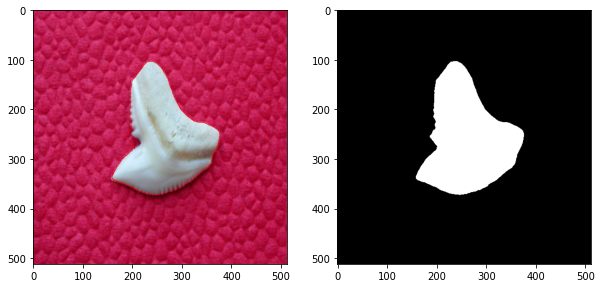

In [7]:
imgcolor = imread("./images/shark_tooth.png")
# ./images/shark_tooth.png
# ./images/star.jpeg
img = rgb2gray(imgcolor)
img_resized  = cv.resize(img, (512,512), interpolation = cv.INTER_AREA)
img_resized_rgb  = cv.resize(imgcolor, (512,512), interpolation = cv.INTER_AREA)

gimg = ms.inverse_gaussian_gradient(img_resized, alpha=10, cutoff_lpf=30)
init_ls = ms.circle_level_set(img_resized.shape)
# MorphGAC.
levelSet = ms.morphological_geodesic_active_contour(gimg, iterations=100,
                                                smoothing=1, threshold=.3,
                                                circle_level_set=init_ls,
                                                balloon=-1)
# overlay_countour get boundary of LevelSet(segment) by [image - eroded(image)] 
overlay_img = overlay_contour(img_resized_rgb, levelSet) 
comparison_plot(overlay_img, levelSet)

In [8]:
from skimage.measure import perimeter

b4 = perimeter(levelSet, neighbourhood=4)  
print('skimage connectivity 4: ',b4)
b8 = perimeter(levelSet, neighbourhood=8)  
print('skimage connectivity 8: ',b8)
1
# ours
perimeter4 = calculate_peremiter(levelSet, 4)
print('weighted perimeter connectivity 4: ',perimeter4)
perimeter8 = calculate_peremiter(levelSet, 8)          # similar to using erosion
print('weighted perimeter connectivity 8: ',perimeter8) 

skimage connectivity 4:  832.6904755831214
skimage connectivity 8:  1026.0
weighted perimeter connectivity 4:  887.36666581637
weighted perimeter connectivity 8:  1026.0


In [9]:
from skimage.measure import label, regionprops
label_img = label(levelSet, connectivity=img.ndim)
props = regionprops(label_img)
print("skimage area",props[0].area)
# ours 
print('Area Pixels from Levelset: ',len( np.argwhere(levelSet == 1) ) ) 
area = bwarea(levelSet)
print('weighted area: ',area)

skimage area 33425
Area Pixels from Levelset:  33425
weighted area:  33466.25
